In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

#EDA

## Table1

In [ ]:
df1=pd.read_csv("table1.csv")


In [ ]:
df1

,ID,CDSEXE,MTREV,NBENF,CDSITFAM,DTADH,CDTMT,CDDEM,DTDEM,ANNEEDEM,CDMOTDEM,CDCATCL,AGEAD,RANGAGEAD,AGEDEM,RANGAGEDEM,RANGDEM,ADH,RANGADH
0,1,2,0,0,A,04/04/1972,0,2,25/06/2003,2003,DV,21,33,3 31-35,64,9 61-65,5 2003,31,7 30-34
1,2,2,0,0,A,12/04/1972,0,2,06/07/2005,2005,DV,21,55,7 51-55,88,b 71-+,7 2005,33,7 30-34
2,3,2,0,0,B,19/07/1972,0,2,14/02/2001,2001,DV,21,39,4 36-40,68,a 66-70,3 2001,29,6 25-29
3,4,3,0,0,M,28/08/1972,0,2,09/03/2006,2006,DV,21,29,2 26-30,63,9 61-65,8 2006,34,7 30-34
4,5,2,0,0,A,06/11/1972,0,2,22/03/1999,1999,DV,21,45,5 41-45,72,b 71-+,1 1999,27,6 25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30327,30328,2,0,0,M,16/06/1982,0,2,15/06/2005,2005,DV,21,32,3 31-35,55,7 51-55,7 2005,23,5 20-24
30328,30329,3,0,0,A,29/02/1980,0,2,27/06/2005,2005,DV,21,36,4 36-40,61,9 61-65,7 2005,25,6 25-29
30329,30330,3,0,0,A,17/09/1980,0,2,12/01/1999,1999,DA,21,32,3 31-35,51,7 51-55,1 1999,19,4 15-19
30330,30331,3,0,0,A,03/07/1980,0,2,03/06/1999,1999,DV,21,31,3 31-35,50,6 46-50,1 1999,19,4 15-19


In [ ]:
# prompt: verifie si il y a des duplications dans df1

# Check for duplicates
duplicates = df1.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicated rows: {num_duplicates}")

# Display duplicated rows
df1[duplicates]


Number of duplicated rows: 0


,ID,CDSEXE,MTREV,NBENF,CDSITFAM,DTADH,CDTMT,CDDEM,DTDEM,ANNEEDEM,CDMOTDEM,CDCATCL,AGEAD,RANGAGEAD,AGEDEM,RANGAGEDEM,RANGDEM,ADH,RANGADH


In [ ]:
df1.shape

(30332, 19)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30332 entries, 0 to 30331
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          30332 non-null  int64 
 1   CDSEXE      30332 non-null  int64 
 2   MTREV       30332 non-null  int64 
 3   NBENF       30332 non-null  int64 
 4   CDSITFAM    30332 non-null  object
 5   DTADH       30332 non-null  object
 6   CDTMT       30332 non-null  int64 
 7   CDDEM       30332 non-null  int64 
 8   DTDEM       30332 non-null  object
 9   ANNEEDEM    30332 non-null  int64 
 10  CDMOTDEM    30332 non-null  object
 11  CDCATCL     30332 non-null  int64 
 12  AGEAD       30332 non-null  int64 
 13  RANGAGEAD   30332 non-null  object
 14  AGEDEM      30332 non-null  int64 
 15  RANGAGEDEM  30332 non-null  object
 16  RANGDEM     30332 non-null  object
 17  ADH         30332 non-null  int64 
 18  RANGADH     27748 non-null  object
dtypes: int64(11), object(8)
memory usage: 4.4+ MB


In [ ]:
df1.describe()

,ID,CDSEXE,MTREV,NBENF,CDTMT,CDDEM,ANNEEDEM,CDCATCL,AGEAD,AGEDEM,ADH
count,30332.000000,30332.000000,3.033200e+04,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000
mean,15166.500000,2.681656,2.890012e+02,0.201998,0.097389,1.999868,2003.156732,21.002934,38.037485,50.086246,12.048760
std,8756.238519,0.670356,8.959197e+03,0.636844,0.431382,0.011483,2.184697,1.635919,11.573183,14.505487,9.051472
min,1.000000,2.000000,0.000000e+00,0.000000,0.000000,1.000000,1999.000000,10.000000,19.000000,19.000000,0.000000
25%,7583.750000,2.000000,0.000000e+00,0.000000,0.000000,2.000000,2001.000000,21.000000,28.000000,38.000000,4.000000
50%,15166.500000,3.000000,0.000000e+00,0.000000,0.000000,2.000000,2004.000000,21.000000,36.000000,50.000000,11.000000
75%,22749.250000,3.000000,0.000000e+00,0.000000,0.000000,2.000000,2005.000000,21.000000,46.000000,61.000000,20.000000
max,30332.000000,4.000000,1.524490e+06,6.000000,6.000000,2.000000,2006.000000,40.000000,89.000000,102.000000,34.000000


1. MTREV (Montant des revenus)

* Beaucoup de 0: possibilité d'avoir des valeurs manquantes déguisée.
* Présence de outliers (1 524 490)

2. NBENF (Nombre d'enfants)

* Médiane = 0 → La majorité des clients n’ont pas d’enfants.

3. CDTMT (Statut du sociétaire)

* Moyenne autour de (0.097), ce qui signifie que la plupart des clients font partie de la catégorie (0).

4. CDDEM (Code Démission)

* Les valeurs sont proches de 2, donc la majorité des clients ont un même code de démission.

5. ANNEEDEM (Année de démission)

* Entre 1999 et 2006, 25% des clients ont démissionée avant 2001

6. CDCATCL (Type de client)

* Min = 10, Max = 40 → Les clients sont répartis sur plusieurs catégories.

7. AGEAD (Âge à l'adhésion):

* 25% des clients ont adhéré avant 28 ans, 75% avant 46 ans.

8. AGEDEM (Âge à la démission)
* Avoir un client qui a démissionné à 102 ans peut faire reference a une erreur de saisie.
*  75% de client ont  démissionné avant 61 ans (3e quartile).
9. ADH (Durée d’adhésion)
* Moyenne = 12 ans.
* Min = 0 ans clients ayant démissionné immédiatement après adhésion
* 75% des clients ont une adhésion ≤ 20 ans, avec un max à 34 ans.


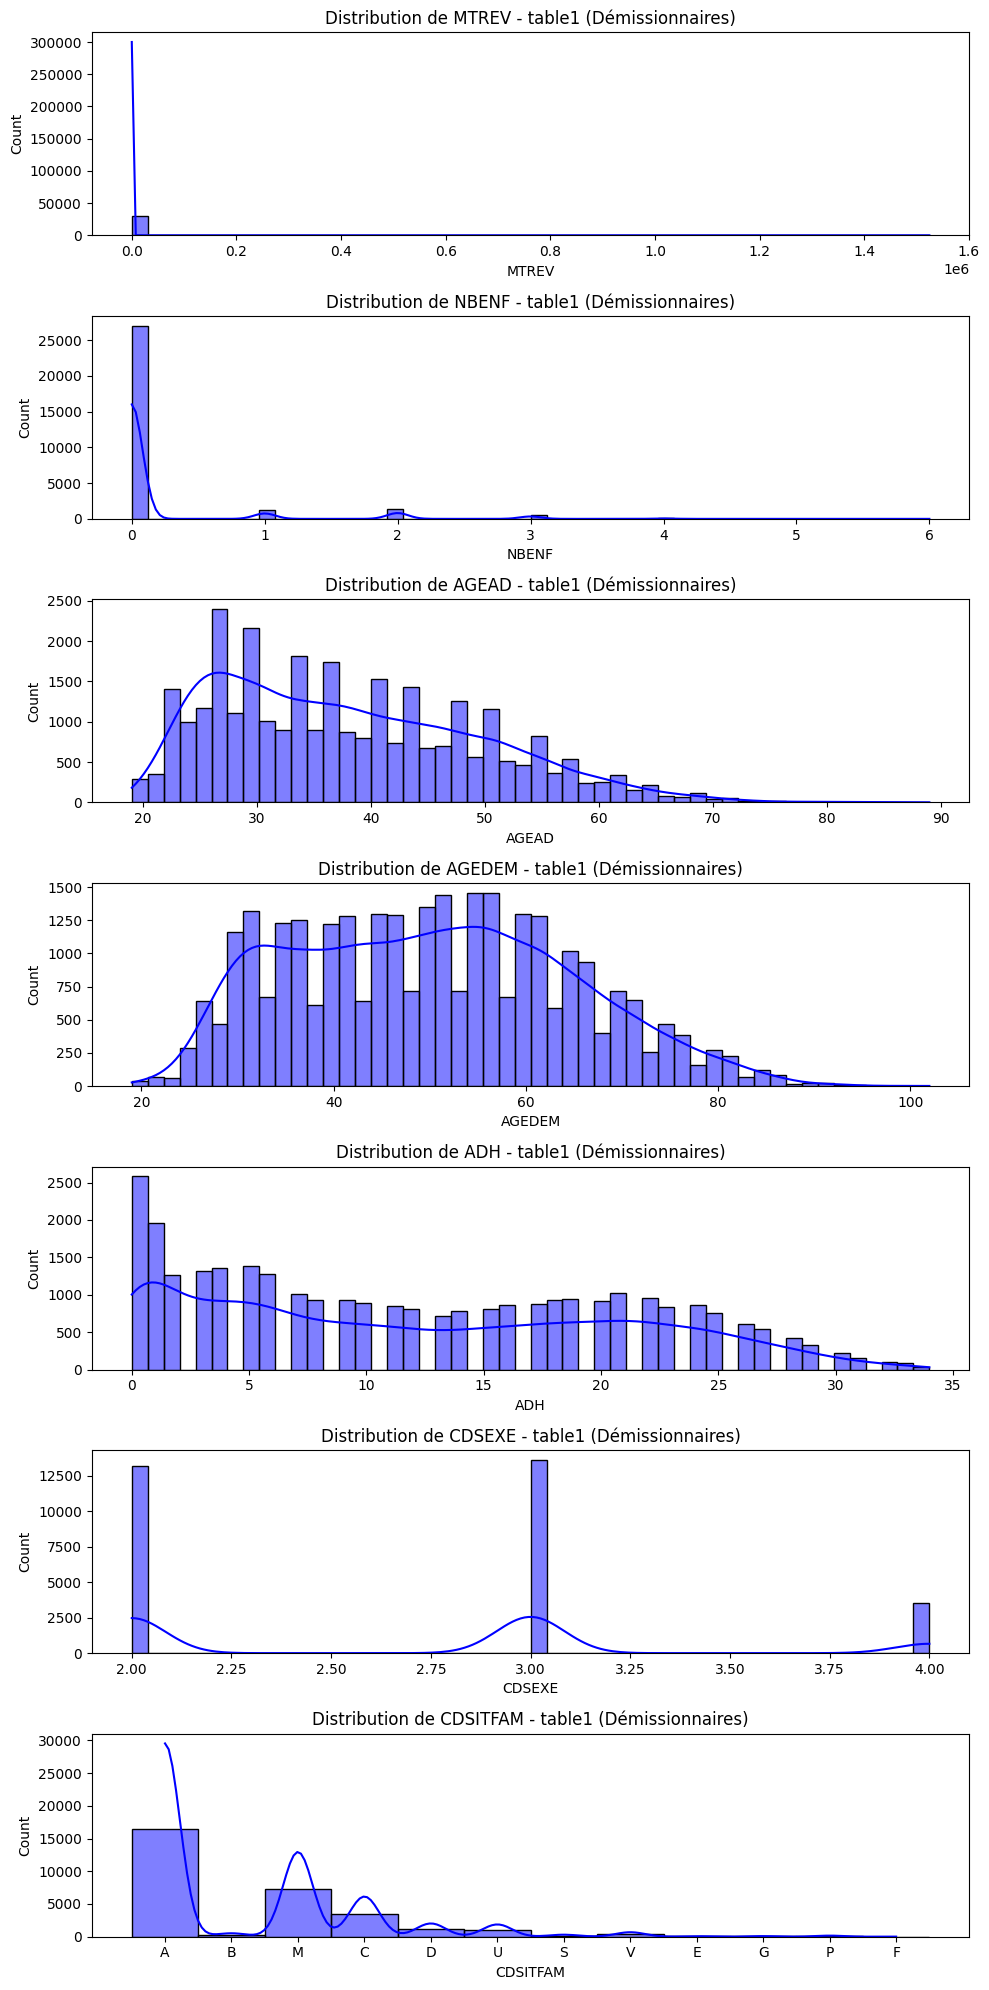

In [ ]:
numeric_columns_table1 = ["MTREV", "NBENF", "AGEAD", "AGEDEM", "ADH","CDSEXE","CDSITFAM",]
numeric_columns_table2 = ["MTREV", "NBENF","CDSEXE","CDSITFAM",]

def plot_histograms(data, columns,title,color):
  fig, axes = plt.subplots(len(columns), 1, figsize=(10, 20))
  for i, col in enumerate(columns):
      if col in data.columns:
          sns.histplot(data[col].dropna(), bins=50, kde=True, ax=axes[i], color=color)
          axes[i].set_title(f"Distribution de {col} - {title}")
  plt.tight_layout()
  plt.show()


plot_histograms(df1, numeric_columns_table1, "table1 (Démissionnaires)", "blue")
#plot_histograms(table2, numeric_columns_table2, "table2 (Démissionnaires)", "red")

In [ ]:
print("Valeurs manquantes dans table1:")
print(df1.isnull().sum(), "\n")

Valeurs manquantes dans table1:
ID               0
CDSEXE           0
MTREV            0
NBENF            0
CDSITFAM         0
DTADH            0
CDTMT            0
CDDEM            0
DTDEM            0
ANNEEDEM         0
CDMOTDEM         0
CDCATCL          0
AGEAD            0
RANGAGEAD        0
AGEDEM           0
RANGAGEDEM       0
RANGDEM          0
ADH              0
RANGADH       2584
dtype: int64 



**Outliers**

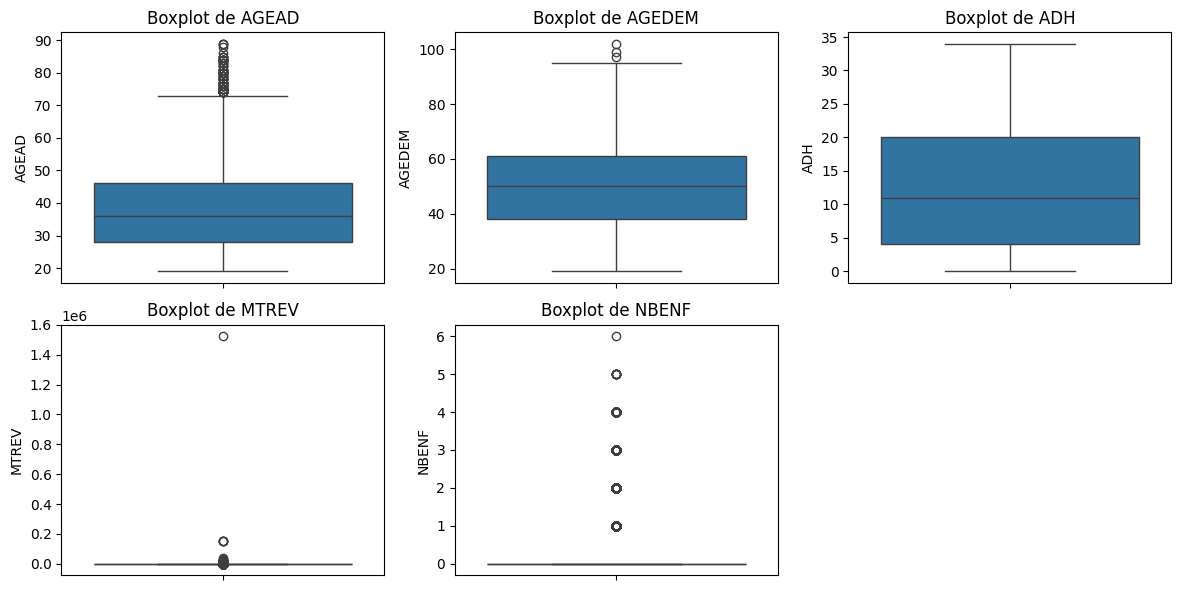

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à analyser
numeric_cols = ["AGEAD", "AGEDEM", "ADH", "MTREV", "NBENF"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


## Table2

In [ ]:
df2 = pd.read_csv("table2.csv")

In [ ]:
df2.head()

,ID,CDSEXE,DTNAIS,MTREV,NBENF,CDSITFAM,DTADH,CDTMT,CDMOTDEM,CDCATCL,BPADH,DTDEM
0,1,1,0000-00-00,0,0,A,30/11/1998,0,NaN,98,0,31/12/1900
1,2,2,02/09/1939,0,0,M,21/02/1968,2,NaN,10,10807,31/12/1900
2,3,3,27/04/1941,1524,0,M,20/01/1970,2,NaN,10,16807,31/12/1900
3,4,2,05/03/1931,0,0,A,15/06/1970,0,DC,21,10807,31/12/1900
4,5,2,25/08/1935,1722,0,G,16/06/1970,2,NaN,10,10807,31/12/1900


In [ ]:
# prompt: verifie si il y a des duplications dans df1

# Check for duplicates
duplicates = df2.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicated rows: {num_duplicates}")

# Display duplicated rows
df2[duplicates]


Number of duplicated rows: 0


,ID,CDSEXE,DTNAIS,MTREV,NBENF,CDSITFAM,DTADH,CDTMT,CDMOTDEM,CDCATCL,BPADH,DTDEM


In [ ]:
df2.shape

(15022, 12)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15022 entries, 0 to 15021
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        15022 non-null  int64 
 1   CDSEXE    15022 non-null  int64 
 2   DTNAIS    15022 non-null  object
 3   MTREV     15022 non-null  int64 
 4   NBENF     15022 non-null  int64 
 5   CDSITFAM  15022 non-null  object
 6   DTADH     15022 non-null  object
 7   CDTMT     15022 non-null  int64 
 8   CDMOTDEM  827 non-null    object
 9   CDCATCL   15022 non-null  int64 
 10  BPADH     15022 non-null  int64 
 11  DTDEM     15022 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.4+ MB


In [ ]:
df2.describe()

,ID,CDSEXE,MTREV,NBENF,CDTMT,CDCATCL,BPADH
count,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000
mean,7511.500000,2.659699,681.732725,0.450672,1.215151,13.557649,15037.494009
std,4336.622207,0.725503,1238.179247,0.882142,1.015643,7.299273,19194.192083
min,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3756.250000,2.000000,0.000000,0.000000,0.000000,10.000000,10107.000000
50%,7511.500000,3.000000,0.000000,0.000000,2.000000,10.000000,11307.000000
75%,11266.750000,3.000000,1470.000000,0.000000,2.000000,21.000000,14907.000000
max,15022.000000,4.000000,38413.000000,13.000000,6.000000,98.000000,88887.000000


In [ ]:
print(df2.isnull().sum(), "\n")

ID              0
CDSEXE          0
DTNAIS          0
MTREV           0
NBENF           0
CDSITFAM        0
DTADH           0
CDTMT           0
CDMOTDEM    14195
CDCATCL         0
BPADH           0
DTDEM           0
dtype: int64 



# Nettoyage

## Table1

In [ ]:
df1['target'] = 1

## Table2

In [ ]:
# Conversion explicite de la colonne DTDEM
df2['DTDEM'] = pd.to_datetime(df2['DTDEM'], format='%d/%m/%Y', errors='coerce')

# Création de la cible : 1 = démissionnaire, 0 = toujours client
df2['target'] = df2['DTDEM'].apply(lambda x: 0 if pd.isna(x) or x == pd.Timestamp('1900-12-31') else 1)

# Vérification du résultat
print("Répartition des classes dans df2['target'] :")
print(df2['target'].value_counts())


Répartition des classes dans df2['target'] :
target
0    14474
1      548
Name: count, dtype: int64


#Fusion

Sélection des colonnes communes pour fusion
ON prend toutes les valeurs de la table 2 on supprime juste l'id
On supprime aussi BPADH car on pourra pas avoir l equivalent dans Table 1 (signification inconnue )
On supprime aussi CDMOTDEM et DTDEM car en soit c est ce que on cherche (predir la demission )

In [ ]:
colonnes_communes = ['CDSEXE', 'MTREV', 'NBENF', 'CDSITFAM', 'DTADH', 'CDTMT', 'CDCATCL', 'target']
df1_common = df1[colonnes_communes]
df2_common = df2[colonnes_communes]

df_fusion = pd.concat([df1_common, df2_common], ignore_index=True)
print("Dataset fusionné :", df_fusion.shape)
# Valeurs manquantes
print("Valeurs manquantes :\n", df_fusion.isnull().sum())
df_fusion.head()

Dataset fusionné : (45354, 8)
Valeurs manquantes :
 CDSEXE      0
MTREV       0
NBENF       0
CDSITFAM    0
DTADH       0
CDTMT       0
CDCATCL     0
target      0
dtype: int64


,CDSEXE,MTREV,NBENF,CDSITFAM,DTADH,CDTMT,CDCATCL,target
0,2,0,0,A,04/04/1972,0,21,1
1,2,0,0,A,12/04/1972,0,21,1
2,2,0,0,B,19/07/1972,0,21,1
3,3,0,0,M,28/08/1972,0,21,1
4,2,0,0,A,06/11/1972,0,21,1


# Preparation de la donnée

In [ ]:
# Création de l'ancienneté
df_fusion['DTADH'] = pd.to_datetime(df_fusion['DTADH'], format='%d/%m/%Y', errors='coerce')
df_fusion['ANCIENNETE'] = 2007 - df_fusion['DTADH'].dt.year

# Suppression de la colonne DTADH
df_fusion.drop(columns=['DTADH'], inplace=True)

In [ ]:
# Normalisation des données
df_encoded = pd.get_dummies(df_fusion, columns=['CDSEXE', 'CDSITFAM', 'CDTMT', 'CDCATCL'], dummy_na=True)
scaler = StandardScaler()
df_encoded[['MTREV', 'NBENF', 'ANCIENNETE']] = scaler.fit_transform(df_encoded[['MTREV', 'NBENF', 'ANCIENNETE']])

In [ ]:
# Séparation des données
y = df_encoded['target']
X = df_encoded.drop(columns='target')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train : {X_train.shape}, Val : {X_val.shape}, Test : {X_test.shape}")

Train : (27212, 39), Val : (9071, 39), Test : (9071, 39)


# Models

## Train and Validation

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Conteneur de résultats
model_results = {}

# 🔹 SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
y_proba_svm = svm_model.predict_proba(X_val)[:, 1]
model_results['SVM'] = {
    'report': classification_report(y_val, y_pred_svm, output_dict=True),
    'auc': roc_auc_score(y_val, y_proba_svm)
}

# 🔹 k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)
y_proba_knn = knn_model.predict_proba(X_val)[:, 1]
model_results['k-NN'] = {
    'report': classification_report(y_val, y_pred_knn, output_dict=True),
    'auc': roc_auc_score(y_val, y_proba_knn)
}

# 🔹 Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)
y_proba_nb = nb_model.predict_proba(X_val)[:, 1]
model_results['Naive Bayes'] = {
    'report': classification_report(y_val, y_pred_nb, output_dict=True),
    'auc': roc_auc_score(y_val, y_proba_nb)
}

#  XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

model_results['XGBoost'] = {
    'report': classification_report(y_val, y_pred_xgb, output_dict=True),
    'auc': roc_auc_score(y_val, y_proba_xgb)
}

# Arbre de decison
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)
y_proba_dt = dt_model.predict_proba(X_val)[:, 1]

model_results['Decision Tree'] = {
    'report': classification_report(y_val, y_pred_dt, output_dict=True),
    'auc': roc_auc_score(y_val, y_proba_dt)
}


# Résumé des AUC pour comparaison
{model: round(result['auc'], 4) for model, result in model_results.items()}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'SVM': np.float64(0.951),
 'k-NN': np.float64(0.9446),
 'Naive Bayes': np.float64(0.9205),
 'XGBoost': np.float64(0.9691),
 'Decision Tree': np.float64(0.9365)}

In [ ]:
from sklearn.metrics import classification_report

# SVM
print("🔹 Rapport de classification - SVM")
print(classification_report(y_val, y_pred_svm))

# k-NN
print("🔹 Rapport de classification - k-NN")
print(classification_report(y_val, y_pred_knn))

# Naive Bayes
print("🔹 Rapport de classification - Naive Bayes")
print(classification_report(y_val, y_pred_nb))

# XGBOOST
print("🔹 Rapport de classification - XGBOOST")
print(classification_report(y_val, y_pred_xgb))

# Decision tree
print("🔹 Rapport de classification - Decision Tree")
print(classification_report(y_val, y_pred_dt))

🔹 Rapport de classification - SVM
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2895
           1       0.94      0.97      0.95      6176

    accuracy                           0.93      9071
   macro avg       0.93      0.92      0.92      9071
weighted avg       0.93      0.93      0.93      9071

🔹 Rapport de classification - k-NN
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2895
           1       0.93      0.96      0.94      6176

    accuracy                           0.92      9071
   macro avg       0.92      0.90      0.91      9071
weighted avg       0.92      0.92      0.92      9071

🔹 Rapport de classification - Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2895
           1       0.91      0.97      0.94      6176

    accuracy                           0.92      9071
   macro avg     

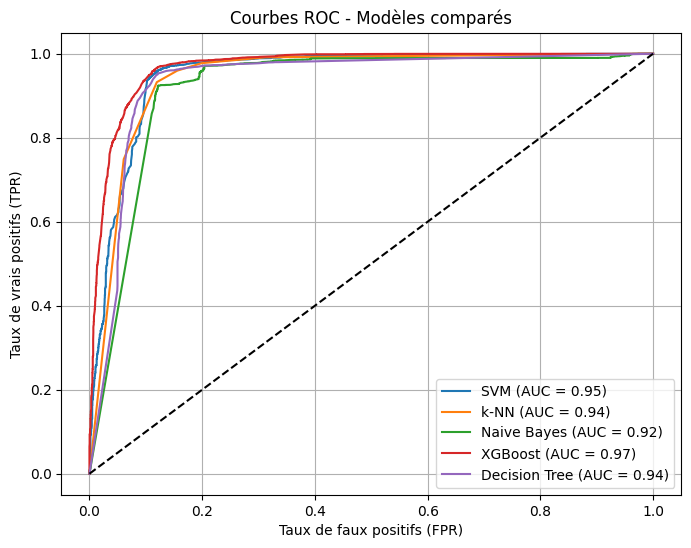

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Courbes ROC
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_proba_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_proba_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_val, y_proba_nb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_proba_dt)


# Tu peux reprendre les autres courbes ici aussi
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_score(y_val, y_proba_svm):.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {roc_auc_score(y_val, y_proba_knn):.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_score(y_val, y_proba_nb):.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_score(y_val, y_proba_xgb):.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_score(y_val, y_proba_dt):.2f})")
plt.plot([0, 1], [0, 1], 'k--')

plt.title("Courbes ROC - Modèles comparés")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Test

In [ ]:
# Conteneur pour les résultats de test
test_results = {}

# Liste des modèles
models_test = {
    "SVM": svm_model,
    "k-NN": knn_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "XGBoost": xgb_model
}

# Boucle d’évaluation sur le jeu de test
for name, model in models_test.items():
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    test_results[name] = {
        'report': classification_report(y_test, y_pred_test, output_dict=True),
        'auc': roc_auc_score(y_test, y_proba_test),
        'fpr': roc_curve(y_test, y_proba_test)[0],
        'tpr': roc_curve(y_test, y_proba_test)[1]
    }

    # Affichage
    print(f"\n{name} - Évaluation sur le jeu de TEST")
    print(classification_report(y_test, y_pred_test))
    print(f"AUC (TEST) : {roc_auc_score(y_test, y_proba_test):.4f}")



SVM - Évaluation sur le jeu de TEST
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2895
           1       0.94      0.97      0.95      6176

    accuracy                           0.93      9071
   macro avg       0.93      0.91      0.92      9071
weighted avg       0.93      0.93      0.93      9071

AUC (TEST) : 0.9539

k-NN - Évaluation sur le jeu de TEST
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2895
           1       0.93      0.96      0.95      6176

    accuracy                           0.92      9071
   macro avg       0.92      0.91      0.91      9071
weighted avg       0.92      0.92      0.92      9071

AUC (TEST) : 0.9477

Naive Bayes - Évaluation sur le jeu de TEST
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2895
           1       0.91      0.97      0.94      6176

    accuracy          

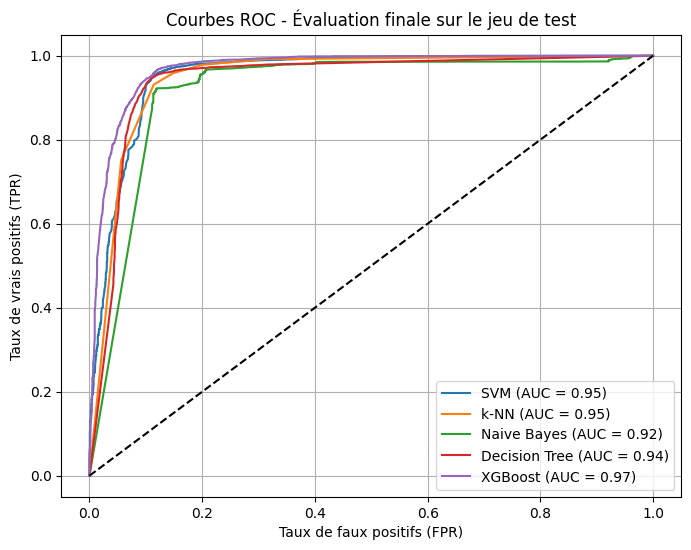

In [ ]:
plt.figure(figsize=(8, 6))

for name, result in test_results.items():
    fpr, tpr = result["fpr"], result["tpr"]
    auc = result["auc"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Courbes ROC - Évaluation finale sur le jeu de test")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


L’objectif dans cette partie est de trouver le modèle qui permet de détecter le plus de démissionnaires raison pour laquelle on va se focaliser sur la classe 1 et on va utiliser la méthode Borda pour classer les performance des 5 modèles


 Classement des modèles selon la méthode de Borda :
          Modèle  Score_Borda  Rang_Precision  Rang_Recall  Rang_F1-score  \
0        XGBoost          5.0             2.0          1.0            1.0   
1            SVM          9.0             3.0          2.0            2.0   
2  Decision Tree         13.0             1.0          5.0            3.0   
3           k-NN         15.0             4.0          4.0            4.0   
4    Naive Bayes         17.0             5.0          2.0            5.0   

   Rang_AUC  
0       1.0  
1       2.0  
2       4.0  
3       3.0  
4       5.0  


<ipython-input-33-27af9f6878c6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_borda, x="Score_Borda", y="Modèle", palette="crest_r")


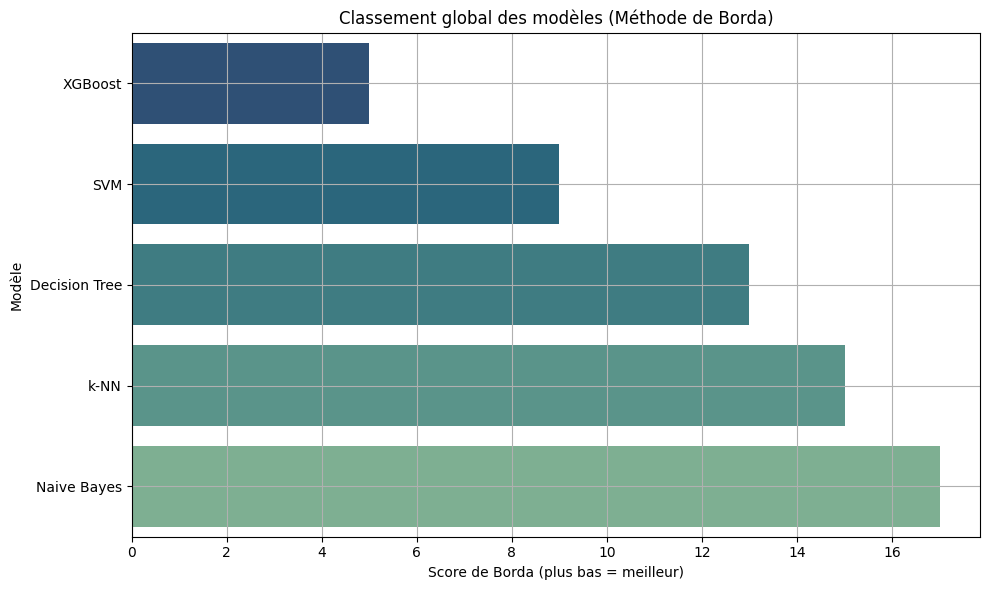

In [ ]:
resume = []

# Réccupération des métriques
for name, result in test_results.items():
    report = result["report"]
    auc = result["auc"]

    # Extraction des métriques pour la classe 1 (démissionnaires)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]

    resume.append({
        "Modèle": name,
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-score": round(f1, 4),
        "AUC": round(auc, 4)
    })


df_resume = pd.DataFrame(resume)

#Borda
criteres = ["Precision", "Recall", "F1-score", "AUC"]

# Etape 1: Calcul des rangs (1 = meilleur)
for crit in criteres:
    df_resume[f"Rang_{crit}"] = df_resume[crit].rank(ascending=False, method="min")

# Etape2: calcule du score Borda = somme des rangs (plus petit = meilleur)
df_resume["Score_Borda"] = df_resume[[f"Rang_{c}" for c in criteres]].sum(axis=1)

# Étape 4 : Trier le score Borda
df_borda = df_resume.sort_values("Score_Borda", ascending=True).reset_index(drop=True)

# Affichage
print("\n Classement des modèles selon la méthode de Borda :")
print(df_borda[["Modèle", "Score_Borda"] + [f"Rang_{c}" for c in criteres]])


# Visualisation du classement Borda
plt.figure(figsize=(10, 6))
sns.barplot(data=df_borda, x="Score_Borda", y="Modèle", palette="crest_r")
plt.title("Classement global des modèles (Méthode de Borda)")
plt.xlabel("Score de Borda (plus bas = meilleur)")
plt.ylabel("Modèle")
plt.grid(True)
plt.tight_layout()
plt.show()


# Probabilité de démission d'un client

Le modèle ayant la meilleure performance est le XGBoost : on va utiliser ce modèle pour la prédiction de la probabilité de démission des clients non démissionnaires dans le jeu de test

In [ ]:
# Prédictions binaires sur le test
y_pred_test = xgb_model.predict(X_test)

# Probabilités de démission (classe 1) sur le test
y_proba_test = xgb_model.predict_proba(X_test)[:, 1]

df_test_eval = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred_test,
    "proba_demission": y_proba_test
})

# Sélection des clients non démissionnaires
non_demissionnaires = df_test_eval[df_test_eval["y_pred"] == 0]

# Identifier ceux avec proba élevée malgré la prédiction 0
non_demissionnaires["alerte"] = non_demissionnaires["proba_demission"].apply(lambda p: "Risque latent" if p > 0.4 else "Client fidéle")

# 6. Visualiser les cas à risque
print("\n Clients prédits NON démissionnaires avec risque latent :")
non_demissionnaires.sort_values(by="proba_demission", ascending=False).head(10)



 Clients prédits NON démissionnaires avec risque latent :


<ipython-input-34-3d5dc15df366>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_demissionnaires["alerte"] = non_demissionnaires["proba_demission"].apply(lambda p: "Risque latent" if p > 0.4 else "Client fidéle")


,y_true,y_pred,proba_demission,alerte
1813,1,0,0.499673,Risque latent
5432,1,0,0.496846,Risque latent
6737,0,0,0.496846,Risque latent
8712,1,0,0.496400,Risque latent
2643,0,0,0.494240,Risque latent
6803,1,0,0.494240,Risque latent
3255,0,0,0.494240,Risque latent
5937,1,0,0.491312,Risque latent
1044,1,0,0.488623,Risque latent
5189,0,0,0.487026,Risque latent


# Explicabilité


## Global explainability - Feature Importance (FI)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


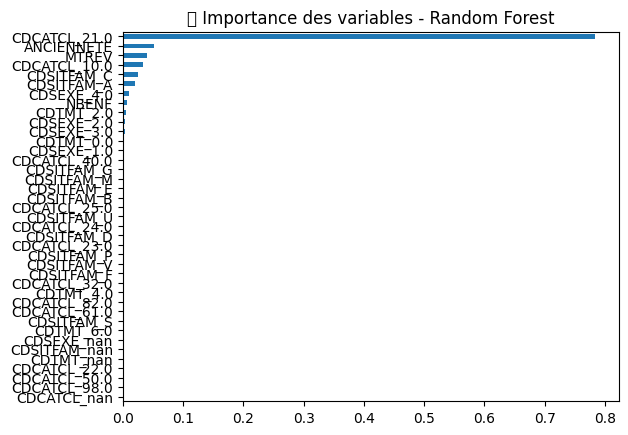

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


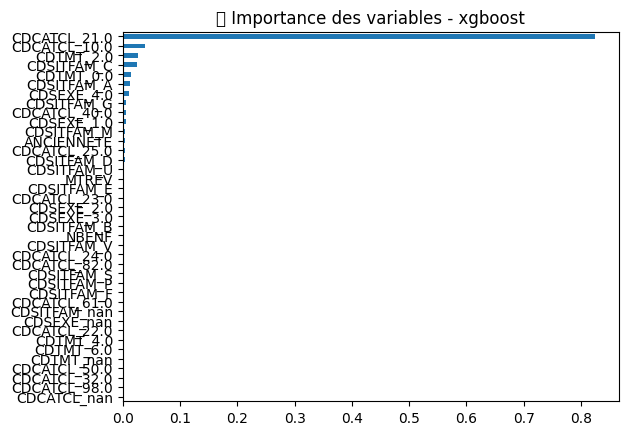

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


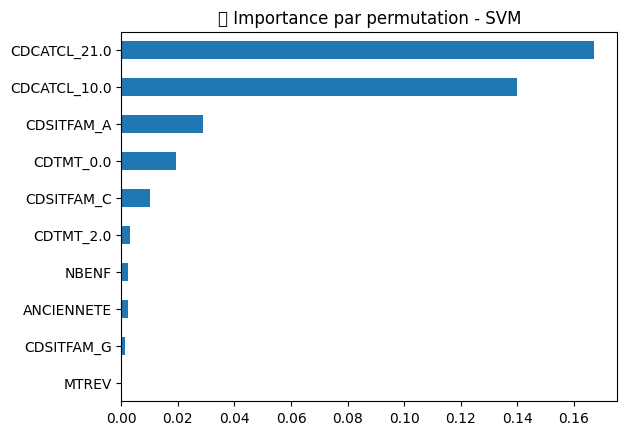

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


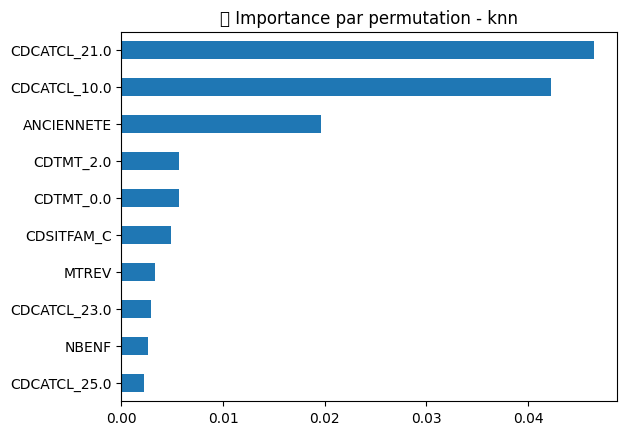

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


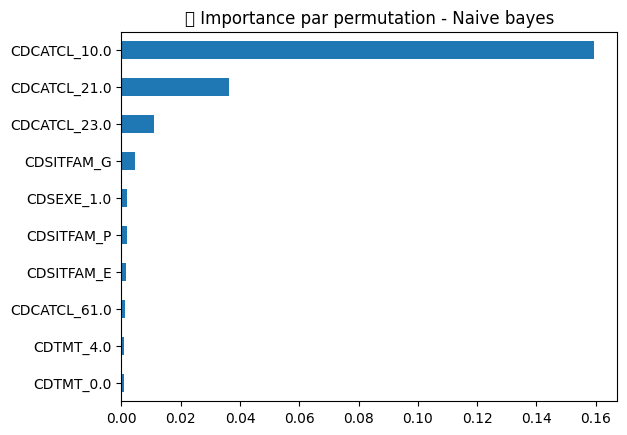

In [ ]:
# TREE DECISION
importances = dt_model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

feat_imp.plot(kind='barh')
plt.title("🌟 Importance des variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()

# xgboost
importances = xgb_model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

feat_imp.plot(kind='barh')
plt.title("🌟 Importance des variables - xgboost")
plt.gca().invert_yaxis()
plt.show()

# SVM
from sklearn.inspection import permutation_importance
result = permutation_importance(svm_model, X_val, y_val, n_repeats=10, random_state=42)
perm = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

perm.head(10).plot(kind='barh')
plt.title("🔍 Importance par permutation - SVM")
plt.gca().invert_yaxis()
plt.show()


# knn_model
result = permutation_importance(knn_model, X_val, y_val, n_repeats=10, random_state=42)
perm = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

perm.head(10).plot(kind='barh')
plt.title("🔍 Importance par permutation - knn")
plt.gca().invert_yaxis()
plt.show()

# Naive bayes
result = permutation_importance(nb_model, X_val, y_val, n_repeats=10, random_state=42)
perm = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

perm.head(10).plot(kind='barh')
plt.title("🔍 Importance par permutation - Naive bayes")
plt.gca().invert_yaxis()
plt.show()


## Local Interpretability - LIME

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4aa512b7e8f2d16961d7a2ded3e1da044f96c64849b4e25fa313cb400659c0da
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

df_test_eval = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred_test
})
df_test_eval["is_error"] = df_test_eval["y_true"] != df_test_eval["y_pred"]

# Sélectionner la premiére instance mal prédite
wrong_index = df_test_eval[df_test_eval["is_error"]].index[0]
instance = X_test.iloc[wrong_index]

# LIME
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=["Actif", "Démissionnaire"],
    mode="classification"
)

exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba,
    num_features=10
)

# Affichage
exp.show_in_notebook(show_table=True)



/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.